In [9]:
# ---------------------------
# 1) Setup & Imports
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from wordcloud import WordCloud

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook")
sns.set_palette("coolwarm")

In [10]:
# ---------------------------
# 2) Load Data (Your Variable Names)
# ---------------------------


Participation_by_State = pd.read_csv("NIBRS_Table_2_Participation_by_State_2024.csv", encoding='latin1')
Incidents_Offenses = pd.read_csv("NIBRS_Table_3_Incidents_Offenses_Victims_and_Known_Offenders_by_Offense_Category_2024.csv", encoding='latin1')
Victims = pd.read_csv("NIBRS_Table_4_Victims_Adult_and_Juvenile_Age_Category_by_Offense_Category_2024.csv", encoding='latin1')
Age_Victims = pd.read_csv("NIBRS_Table_5_Victims_Age_by_Offense_Category_2024.csv", encoding='latin1')
Sex_Victims = pd.read_csv("NIBRS_Table_6_Victims_Sex_by_Offense_Category_2024.csv", encoding='latin1')
Race_Victims = pd.read_csv("NIBRS_Table_7_Victims_Race_by_Offense_Category_2024.csv", encoding='latin1')
Offenders_AJ = pd.read_csv("NIBRS_Table_8_Offenders_Adult_and_Juvenile_Age_Category_by_Offense_Category_2024.csv", encoding='latin1')
Offenders_Age = pd.read_csv("NIBRS_Table_9_Offenders_Age_by_Offense_Category_2024.csv", encoding='latin1')
Offenders_Sex = pd.read_csv("NIBRS_Table_10_Offenders_Sex_by_Offense_Category_2024.csv", encoding='latin1')
Offenders_Race = pd.read_csv("NIBRS_Table_11_Offenders_Race_by_Offense_Category_2024.csv", encoding='latin1')
Arrestees_AJ = pd.read_csv("NIBRS_Table_12_Arrestees_Adult_and_Juvenile_Age_Category_by_Arrest_Offense_Category_2024.csv", encoding='latin1')
Arrestees_Age = pd.read_csv("NIBRS_Table_13_Arrestees_Age_by_Arrest_Offense_Category_2024.csv", encoding='latin1')
Arrestees_Sex = pd.read_csv("NIBRS_Table_14_Arrestees_Sex_by_Arrest_Offense_Category_2024.csv", encoding='latin1')
Arrestees_Race = pd.read_csv("NIBRS_Table_15_Arrestees_Race_by_Arrest_Offense_Category_2024.csv", encoding='latin1')
Victim_Offender_Relationship = pd.read_csv("NIBRS_Table_16_Relationship_of_Victims_to_Offenders_by_Offense_Category_2024.csv", encoding='latin1')
Crimes_Persons_Location = pd.read_csv("NIBRS_Table_17_Crimes_Against_Persons_Offenses_Offense_Category_by_Location_2024.csv", encoding='latin1')
Crimes_Property_Location = pd.read_csv("NIBRS_Table_18_Crimes_Against_Property_Offenses_Offense_Category_by_Location_2024.csv", encoding='latin1')
Crimes_Society_Location = pd.read_csv("NIBRS_Table_19_Crimes_Against_Society_Offenses_Offense_Category_by_Location_2024.csv", encoding='latin1')
Crimes_Persons_Time = pd.read_csv("NIBRS_Table_20_Crimes_Against_Persons_Incidents_Offense_Category_by_Time_of_Day_2024.csv", encoding='latin1')
Crimes_Property_Time = pd.read_csv("NIBRS_Table_21_Crimes_Against_Property_Incidents_Offense_Category_by_Time_of_Day_2024.csv", encoding='latin1')
Crimes_Society_Time = pd.read_csv("NIBRS_Table_22_Crimes_Against_Society_Incidents_Offense_Category_by_Time_of_Day_2024.csv", encoding='latin1')
Weapon_Use = pd.read_csv("NIBRS_Table_23_Offenses_Involving_Weapon_Use_Off_Cat_by_Type_of_Weapon_Force_Involved_2024.csv", encoding='latin1')
Murder_Assault_Circumstances = pd.read_csv("NIBRS_Table_24_Murder_and_Nonnegligent_Manslaughter_and_Aggravated_Assault_Victims_Off_Type_by_Circumst_2024.csv", encoding='latin1')
Justifiable_Homicide = pd.read_csv("NIBRS_Table_26_Individuals_Justifiably_Killed_Justifiable_Homicide_Circum_by_Agg_Aslt_Homicide_Circum_2024.csv", encoding='latin1')
Crimes_Persons_State = pd.read_csv("NIBRS_Table_27_Crimes_Against_Persons_Offenses_Offense_Category_by_State_2024.csv", encoding='latin1')
Crimes_Property_State = pd.read_csv("NIBRS_Table_28_Crimes_Against_Property_Offenses_Offense_Category_by_State_2024.csv", encoding='latin1')
Crimes_Society_State = pd.read_csv("NIBRS_Table_29_Crimes_Against_Society_Offenses_Offense_Category_by_State_2024.csv", encoding='latin1')
Offenses_Completed_Attempted = pd.read_csv("NIBRS_Table_30_Number_of_Offenses_Completed_and_Attempted_by_Offense_Category_2024.csv", encoding='latin1')
Incidents_Cleared = pd.read_csv("NIBRS_Table_31_Incidents_Cleared_by_Offense_Category_2024.csv", encoding='latin1')
Drug_Seizures = pd.read_csv("NIBRS_Table_32_Incidents_with_Drugs_Narcotics_Seized_by_Suspected_Drug_Type_2024.csv", encoding='latin1')
Drug_Alcohol_Use = pd.read_csv("NIBRS_Table_33_Offenses_Involving_Offenders_Suspected_Use_Drugs_Narcotics_and_Alcohol_by_Offense_Category_2024.csv", encoding='latin1')
US_Offense_Agency = pd.read_csv("NIBRS_United_States_Offense_Type_by_Agency_2024.csv", encoding='latin1',low_memory=False )


In [11]:
# ---------------------------
# 3) Column Name Normalization
#     - remove newlines, double spaces, weird hyphen chars, trim
#     - drop Unnamed columns
# ---------------------------
Participation_by_State.columns = Participation_by_State.columns.str.replace("\n"," ").str.replace("â\x88\x92","-").str.replace("  "," ").str.strip()
Incidents_Offenses.columns = Incidents_Offenses.columns.str.replace("\n"," ").str.replace("â\x88\x92","-").str.replace("  "," ").str.strip()
Victims.columns = Victims.columns.str.replace("\n"," ").str.replace("â\x88\x92","-").str.replace("  "," ").str.strip()
Age_Victims.columns = Age_Victims.columns.str.replace("\n"," ").str.replace("â\x88\x92","-").str.replace("?","-").str.replace("  "," ").str.strip()
Sex_Victims.columns = Sex_Victims.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Race_Victims.columns = Race_Victims.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Offenders_AJ.columns = Offenders_AJ.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Offenders_Age.columns = Offenders_Age.columns.str.replace("\n"," ").str.replace("?","-").str.replace("  "," ").str.strip()
Offenders_Sex.columns = Offenders_Sex.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Offenders_Race.columns = Offenders_Race.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Arrestees_AJ.columns = Arrestees_AJ.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Arrestees_Age.columns = Arrestees_Age.columns.str.replace("\n"," ").str.replace("Nov-15","11-15").str.replace("  "," ").str.strip()
Arrestees_Sex.columns = Arrestees_Sex.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Arrestees_Race.columns = Arrestees_Race.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Victim_Offender_Relationship.columns = Victim_Offender_Relationship.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Persons_Location.columns = Crimes_Persons_Location.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Property_Location.columns = Crimes_Property_Location.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Society_Location.columns = Crimes_Society_Location.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Persons_Time.columns = Crimes_Persons_Time.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Property_Time.columns = Crimes_Property_Time.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Society_Time.columns = Crimes_Society_Time.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Weapon_Use.columns = Weapon_Use.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Murder_Assault_Circumstances.columns = Murder_Assault_Circumstances.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Justifiable_Homicide.columns = Justifiable_Homicide.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Persons_State.columns = Crimes_Persons_State.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Property_State.columns = Crimes_Property_State.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Crimes_Society_State.columns = Crimes_Society_State.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Offenses_Completed_Attempted.columns = Offenses_Completed_Attempted.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Incidents_Cleared.columns = Incidents_Cleared.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Drug_Seizures.columns = Drug_Seizures.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
Drug_Alcohol_Use.columns = Drug_Alcohol_Use.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()
US_Offense_Agency.columns = US_Offense_Agency.columns.str.replace("\n"," ").str.replace("  "," ").str.strip()

Participation_by_State = Participation_by_State.loc[:, ~Participation_by_State.columns.str.contains('^Unnamed')]
Offenders_Race = Offenders_Race.loc[:, ~Offenders_Race.columns.str.contains('^Unnamed')]
Incidents_Cleared = Incidents_Cleared.loc[:, ~Incidents_Cleared.columns.str.contains('^Unnamed')]
Drug_Alcohol_Use = Drug_Alcohol_Use.loc[:, ~Drug_Alcohol_Use.columns.str.contains('^Unnamed')]

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["axes.edgecolor"] = "#DDDDDD"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#EEEEEE"
sns.set_palette("viridis")

In [12]:


# =====================================
# 1) OVERVIEW — Quick sanity summaries
# =====================================
# We only show heads and shapes to verify alignment with your normalized columns.
print("\n[Shapes]")
print("Participation_by_State:", Participation_by_State.shape)
print("Incidents_Offenses:", Incidents_Offenses.shape)
print("Victims:", Victims.shape)
print("Age_Victims:", Age_Victims.shape)
print("Sex_Victims:", Sex_Victims.shape)
print("Race_Victims:", Race_Victims.shape)
print("Offenders_AJ:", Offenders_AJ.shape)
print("Offenders_Age:", Offenders_Age.shape)
print("Offenders_Sex:", Offenders_Sex.shape)
print("Offenders_Race:", Offenders_Race.shape)
print("Arrestees_AJ:", Arrestees_AJ.shape)
print("Arrestees_Age:", Arrestees_Age.shape)
print("Arrestees_Sex:", Arrestees_Sex.shape)
print("Arrestees_Race:", Arrestees_Race.shape)
print("Victim_Offender_Relationship:", Victim_Offender_Relationship.shape)
print("Crimes_Persons_Location:", Crimes_Persons_Location.shape)
print("Crimes_Property_Location:", Crimes_Property_Location.shape)
print("Crimes_Society_Location:", Crimes_Society_Location.shape)
print("Crimes_Persons_Time:", Crimes_Persons_Time.shape)
print("Crimes_Property_Time:", Crimes_Property_Time.shape)
print("Crimes_Society_Time:", Crimes_Society_Time.shape)
print("Weapon_Use:", Weapon_Use.shape)
print("Murder_Assault_Circumstances:", Murder_Assault_Circumstances.shape)
print("Justifiable_Homicide:", Justifiable_Homicide.shape)
print("Crimes_Persons_State:", Crimes_Persons_State.shape)
print("Crimes_Property_State:", Crimes_Property_State.shape)
print("Crimes_Society_State:", Crimes_Society_State.shape)
print("Offenses_Completed_Attempted:", Offenses_Completed_Attempted.shape)
print("Incidents_Cleared:", Incidents_Cleared.shape)
print("Drug_Seizures:", Drug_Seizures.shape)
print("Drug_Alcohol_Use:", Drug_Alcohol_Use.shape)
print("US_Offense_Agency:", US_Offense_Agency.shape)



[Shapes]
Participation_by_State: (52, 3)
Incidents_Offenses: (27, 5)
Victims: (20, 5)
Age_Victims: (20, 16)
Sex_Victims: (20, 5)
Race_Victims: (20, 8)
Offenders_AJ: (27, 5)
Offenders_Age: (27, 16)
Offenders_Sex: (27, 5)
Offenders_Race: (29, 8)
Arrestees_AJ: (35, 5)
Arrestees_Age: (35, 16)
Arrestees_Sex: (35, 4)
Arrestees_Race: (35, 8)
Victim_Offender_Relationship: (9, 7)
Crimes_Persons_Location: (47, 7)
Crimes_Property_Location: (47, 14)
Crimes_Society_Location: (47, 8)
Crimes_Persons_Time: (28, 7)
Crimes_Property_Time: (28, 14)
Crimes_Society_Time: (28, 8)
Weapon_Use: (24, 9)
Murder_Assault_Circumstances: (10, 4)
Justifiable_Homicide: (3, 9)
Crimes_Persons_State: (52, 9)
Crimes_Property_State: (52, 16)
Crimes_Society_State: (52, 10)
Offenses_Completed_Attempted: (27, 4)
Incidents_Cleared: (27, 4)
Drug_Seizures: (19, 2)
Drug_Alcohol_Use: (27, 5)
US_Offense_Agency: (12431, 69)


In [13]:
# Peek critical numeric columns exist post-normalization
print("\n[Key Columns — Post-normalization samples]")
print("Victims columns:", Victims.columns.tolist())
print("Sex_Victims columns:", Sex_Victims.columns.tolist())
print("Crimes_Persons_State columns:", Crimes_Persons_State.columns.tolist())

# Ensure numeric conversion for Victims age-related columns
Victims[["Adult","Juvenile2","Unknown Age"]] = (
    Victims[["Adult","Juvenile2","Unknown Age"]]
    .replace({",":""}, regex=True)   # remove commas
    .apply(pd.to_numeric, errors="coerce")   # convert to numbers
)



[Key Columns — Post-normalization samples]
Victims columns: ['Offense Category', 'Total Victims1', 'Adult', 'Juvenile2', 'Unknown Age']
Sex_Victims columns: ['Offense Category', 'Total Victims1', 'Male', 'Female', 'Unknown Sex']
Crimes_Persons_State columns: ['State', 'Number of Participating Agencies', 'Population Covered', 'Total Offenses', 'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses', 'Kidnapping/ Abduction', 'Sex Offenses']


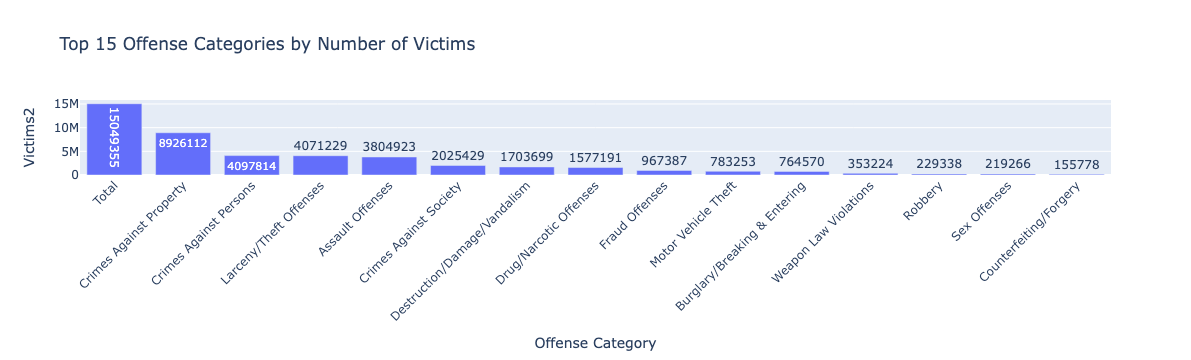

In [14]:

# =====================================
# 2) UNIVARIATE — Core distributions
# =====================================
# 2.1 Victims: totals & composition
top_offenses = Incidents_Offenses.nlargest(15, 'Victims2')

fig = px.bar(
    top_offenses, 
    x="Offense Category", 
    y="Victims2",
    title="Top 15 Offense Categories by Number of Victims",
    text="Victims2"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

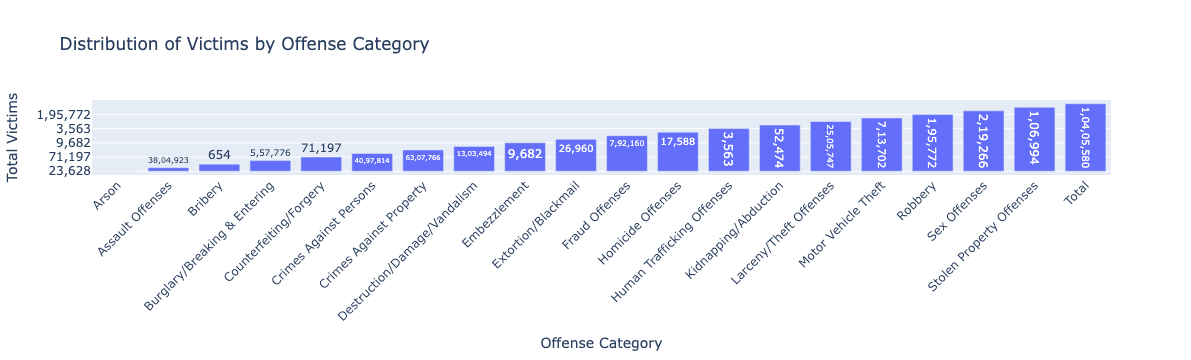

In [15]:


total_victims = Victims.groupby("Offense Category")["Total Victims1"].sum().reset_index()
total_victims = total_victims.rename(columns={"Total Victims1": "Total Victims"})

fig = px.bar(
    total_victims,
    x="Offense Category",
    y="Total Victims",
    title="Distribution of Victims by Offense Category",
    text="Total Victims"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

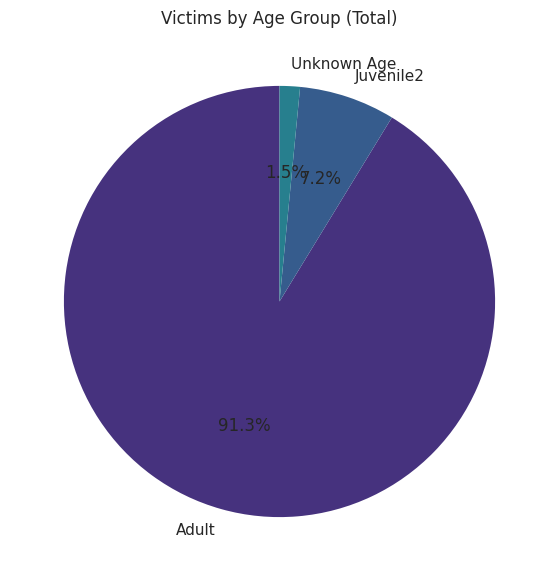

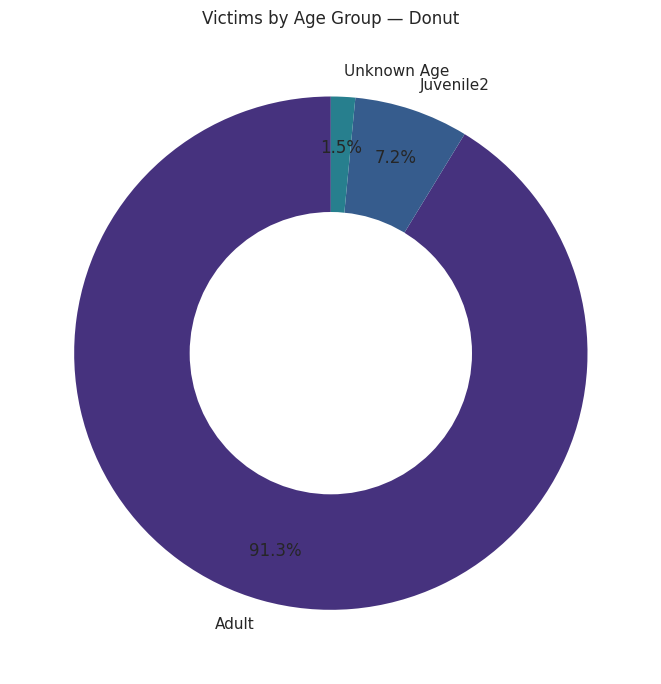

In [8]:
Victims_age_sum = Victims[["Adult","Juvenile2","Unknown Age"]].sum()
plt.figure(figsize=(7,7))
plt.pie(Victims_age_sum.values, labels=Victims_age_sum.index, autopct="%1.1f%%", startangle=90)
plt.title("Victims by Age Group (Total)")
plt.show()

# Stylish donut
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(Victims_age_sum.values, labels=Victims_age_sum.index, autopct="%1.1f%%", pctdistance=0.8, startangle=90)
centre_circle = plt.Circle((0,0),0.55,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Victims by Age Group — Donut")
plt.tight_layout()
plt.show()


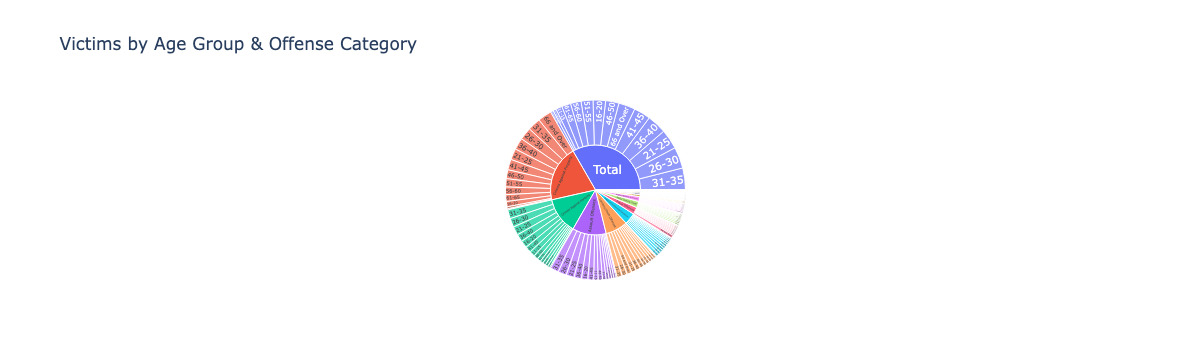

In [15]:


age_long = Age_Victims.melt(
    id_vars=["Offense Category"], 
    value_vars=["10 and Under", "11-15", "16-20", "21-25", "26-30", 
                "31-35", "36-40", "41-45", "46-50", "51-55", 
                "56-60", "61-65", "66 and Over", "Unknown Age"],
    var_name="Age", 
    value_name="Victims"
)

# Interactive Sunburst: Victims by Age Group & Offense Category
age_long["Victims"] = (
    age_long["Victims"].astype(str)
    .str.replace(",", "", regex=False)
    .astype(int)
)

# Single Sunburst (interactive)
fig = px.sunburst(
    age_long, 
    path=["Offense Category", "Age"], 
    values="Victims", 
    title="Victims by Age Group & Offense Category"
)
fig.show()



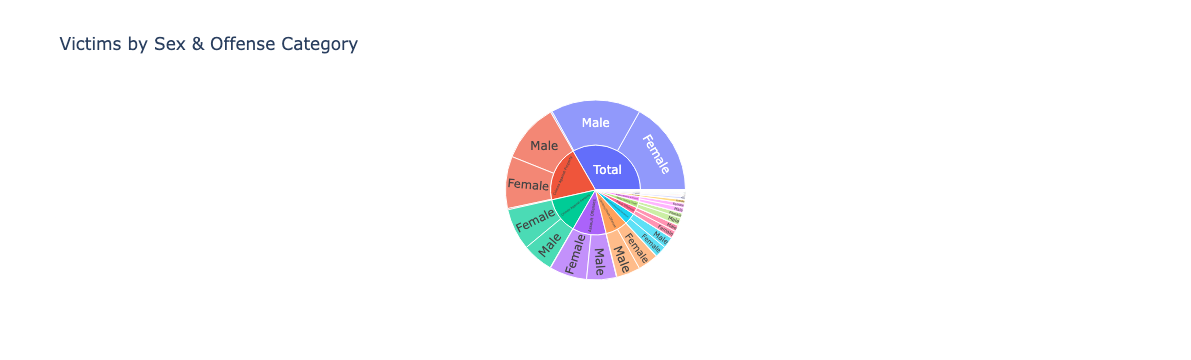

In [58]:

# Victims by Sex (interactive sunburst)
# Convert wide → long for sunburst
sex_long = Sex_Victims.melt(
    id_vars=["Offense Category"], 
    value_vars=["Male", "Female", "Unknown Sex"],
    var_name="Sex", 
    value_name="Victims"
)

# Interactive Sunburst: Victims by Sex & Offense Category
fig = px.sunburst(
    sex_long, 
    path=["Offense Category", "Sex"], 
    values="Victims", 
    title="Victims by Sex & Offense Category"
)
fig.show()


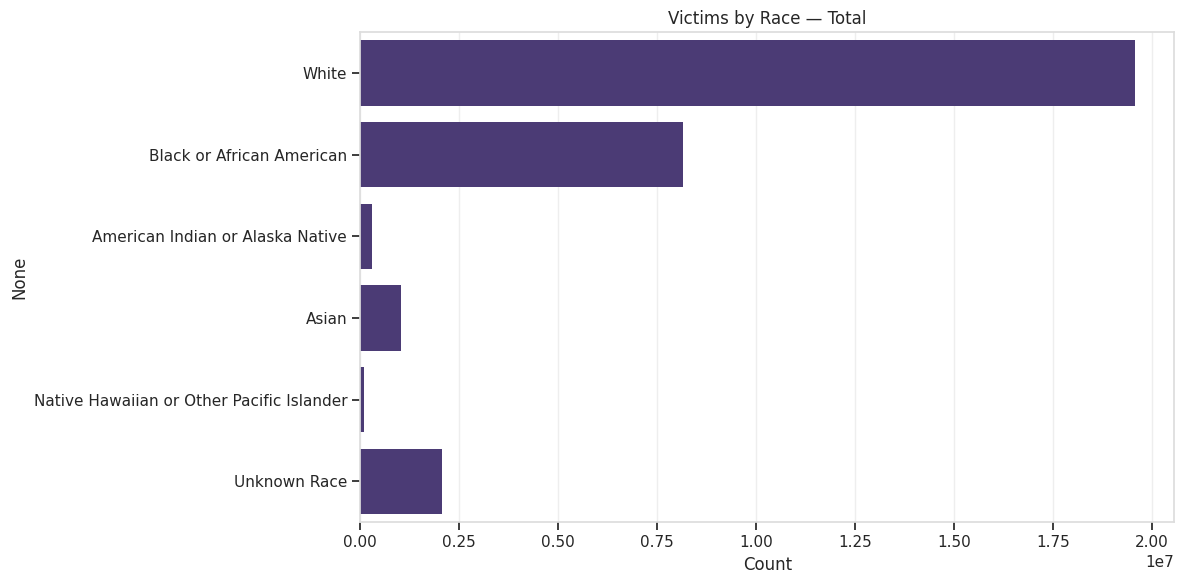

In [18]:
# 2.3 Race breakdown (Victims)
race_cols = [
    "White",
    "Black or African American",
    "American Indian or Alaska Native",
    "Asian",
    "Native Hawaiian or Other Pacific Islander",
    "Unknown Race"
]
plt.figure(figsize=(12,6))
race_sum = Race_Victims[race_cols].sum()
sns.barplot(x=race_sum.values, y=race_sum.index)
plt.title("Victims by Race — Total")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

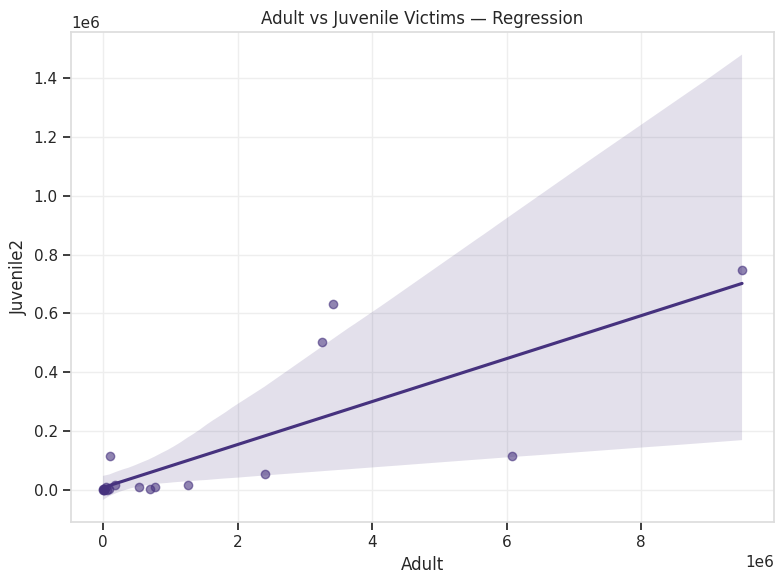

In [22]:
# =====================================
# 3) BIVARIATE — Relationships
# =====================================
# 3.1 Adult vs Juvenile scatter (Victims)
plt.figure(figsize=(8,6))
sns.regplot(data=Victims, x="Adult", y="Juvenile2", scatter_kws={"alpha":0.6})
plt.title("Adult vs Juvenile Victims — Regression")
plt.tight_layout()
plt.show()


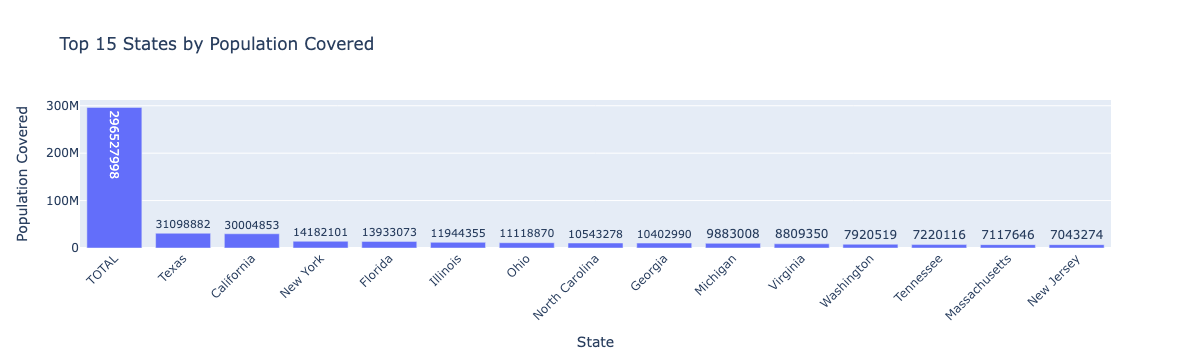

In [23]:


Participation_by_State["Population Covered"] = (
    Participation_by_State["Population Covered"].astype(str)
    .str.replace(",", "", regex=False)
    .astype(int)
)

# Top 15 States by Population Covered
top_states = Participation_by_State.nlargest(15, "Population Covered")

fig = px.bar(
    top_states,
    x="State",
    y="Population Covered",
    title="Top 15 States by Population Covered",
    text="Population Covered"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

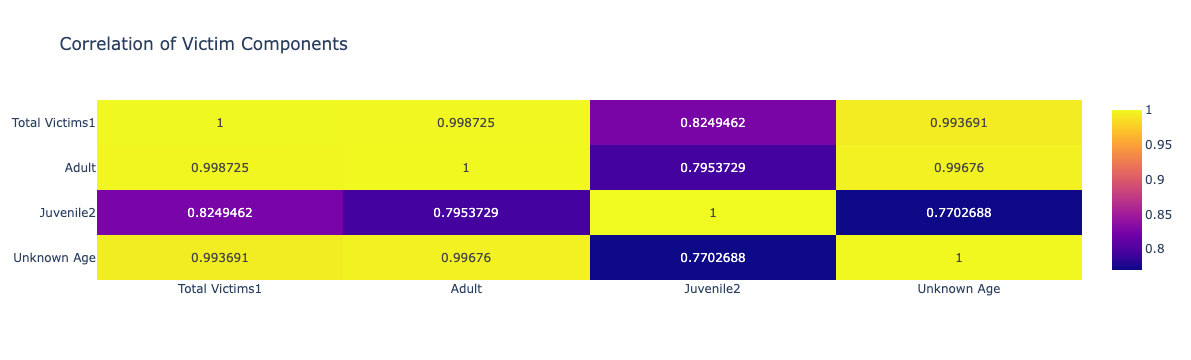

In [27]:
# 3.2 Correlation among age components (Victims)

corr = Victims.select_dtypes(include='number').corr()
fig = px.imshow(corr, text_auto=True, aspect="auto",
                title="Correlation of Victim Components")
fig.show()



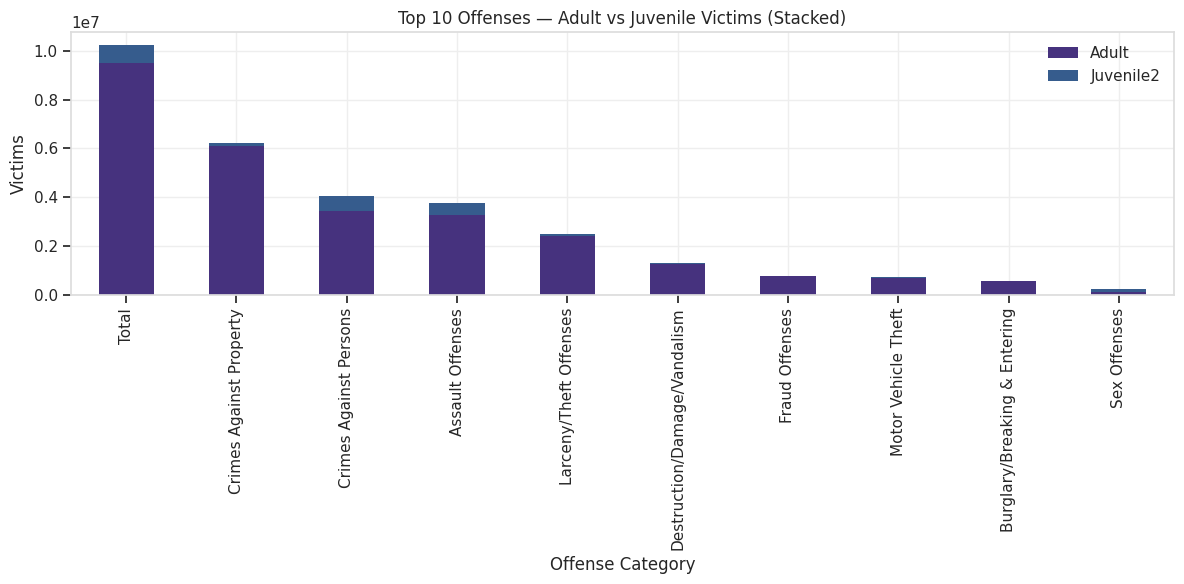

In [28]:
# 3.3 Stacked bars: Adult & Juvenile across Offense (Top 10)
Victims_top10 = Victims.sort_values("Total Victims1", ascending=False).head(10)
Victims_top10_plot = Victims_top10.set_index("Offense Category")[["Adult","Juvenile2"]]
Victims_top10_plot.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Top 10 Offenses — Adult vs Juvenile Victims (Stacked)")
plt.ylabel("Victims")
plt.tight_layout()
plt.show()

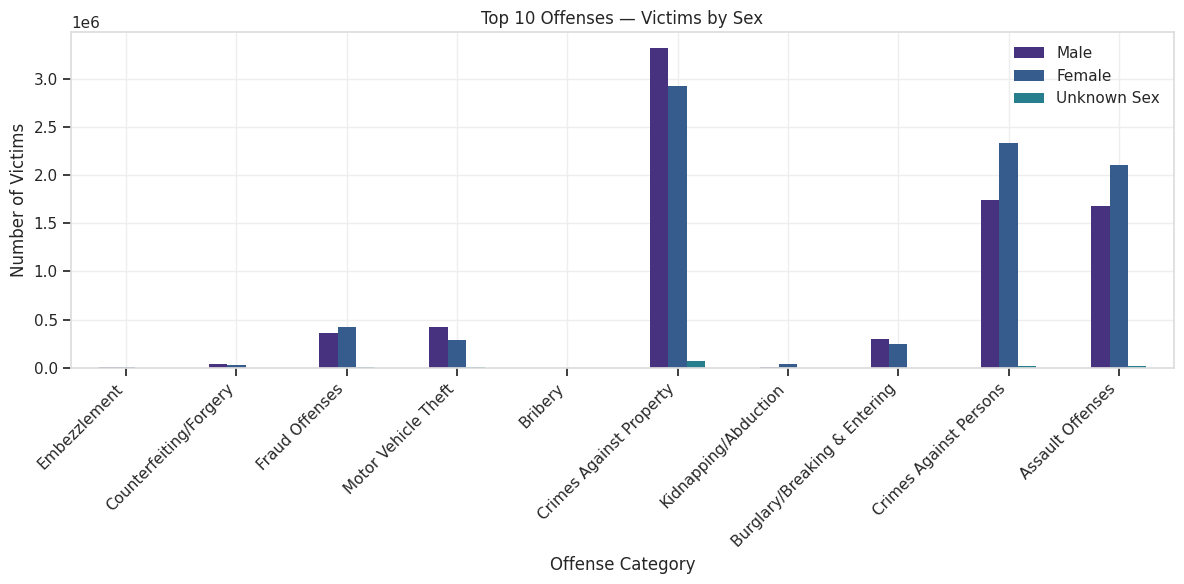

In [29]:
# 3.4 Sex by Offense (Top 10 categories by total victims)
for col in ["Male", "Female", "Unknown Sex"]:
    Sex_Victims[col] = (
        Sex_Victims[col]
        .astype(str)               # in case some are not string
        .str.replace(",", "", regex=True)   # remove commas
        .astype(float)             # convert to numeric
    )

# Now redo the top 10 analysis
Sex_top10 = (
    Sex_Victims
    .set_index("Offense Category")
    .join(Victims.set_index("Offense Category")[["Total Victims1"]], rsuffix="_victims")
    .sort_values("Total Victims1", ascending=False)
    .head(10)
)[["Male", "Female", "Unknown Sex"]]

# Plot
Sex_top10.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Offenses — Victims by Sex")
plt.xlabel("Offense Category")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

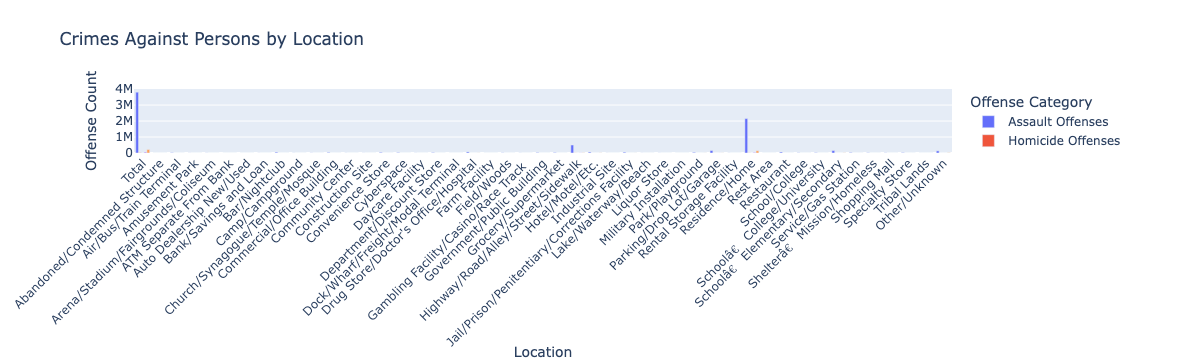

In [31]:

# =====================================
# 4) ADVANCED VISUALS — Unique charts
# =====================================

df_long = Crimes_Persons_Location.melt(
    id_vars="Location",
    value_vars=["Assault Offenses", "Homicide Offenses", 
                "Human Trafficking Offenses", "Kidnapping/ Abduction", "Sex Offenses"],
    var_name="Offense Category",
    value_name="Offense Count"   # changed from "Total Offenses"
)

# Grouped bar chart
fig = px.bar(
    df_long,
    x="Location",
    y="Offense Count",
    color="Offense Category",
    barmode="group",
    title="Crimes Against Persons by Location"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


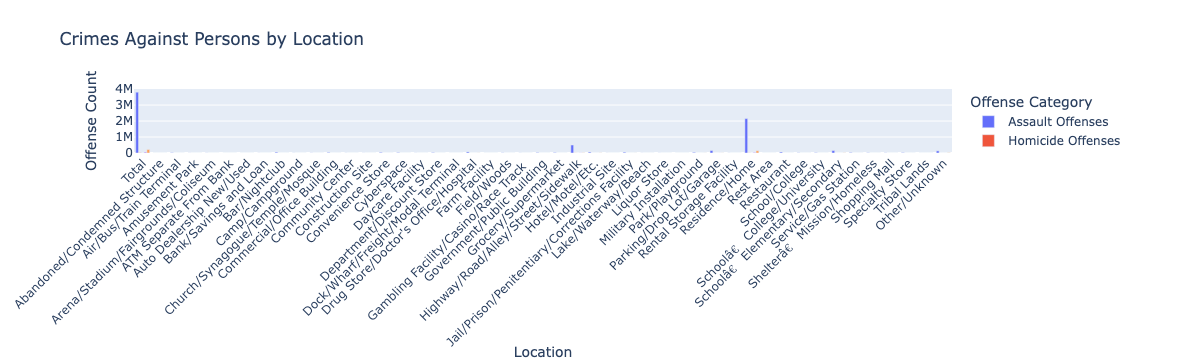

In [57]:
offense_cols = [col for col in Crimes_Persons_Location.columns if col not in ["Location", "Total Offenses"]]

df_long = Crimes_Persons_Location.melt(
    id_vars="Location",
    value_vars=offense_cols,
    var_name="Offense Category",
    value_name="Offense Count"
)

fig = px.bar(
    df_long,
    x="Location",
    y="Offense Count",
    color="Offense Category",
    barmode="group",
    title="Crimes Against Persons by Location"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

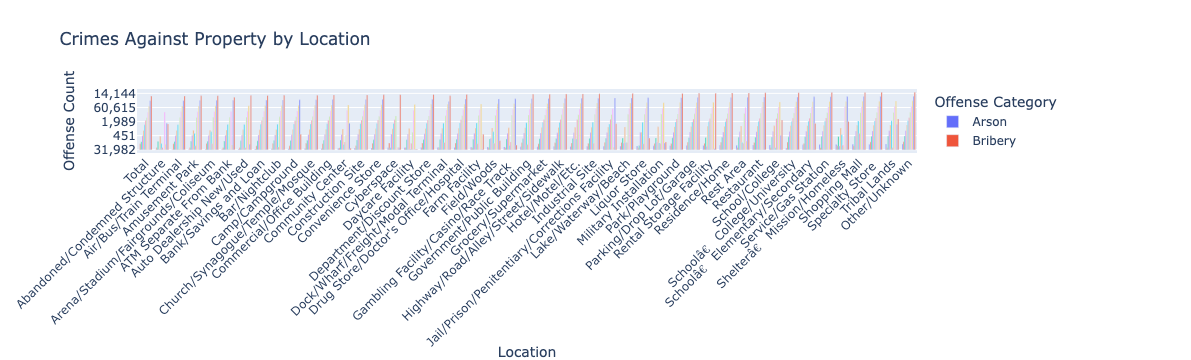

In [33]:





# ============================
# Crimes Against Property by Location
# ============================
offense_cols = [col for col in Crimes_Property_Location.columns if col not in ["Location", "Total Offenses"]]

df_long = Crimes_Property_Location.melt(
    id_vars="Location",
    value_vars=offense_cols,
    var_name="Offense Category",
    value_name="Offense Count"
)

fig = px.bar(
    df_long,
    x="Location",
    y="Offense Count",
    color="Offense Category",
    barmode="group",
    title="Crimes Against Property by Location"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()




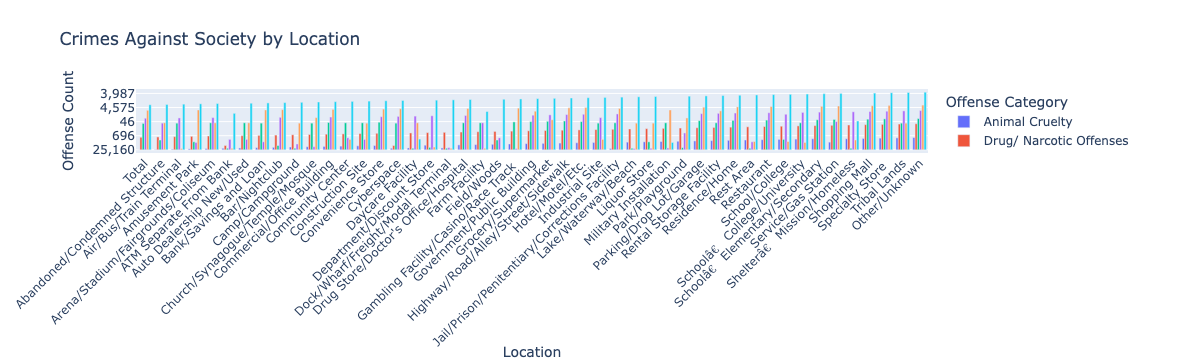

In [34]:
# ============================
# Crimes Against Society by Location
# ============================
offense_cols = [col for col in Crimes_Society_Location.columns if col not in ["Location", "Total Offenses"]]

df_long = Crimes_Society_Location.melt(
    id_vars="Location",
    value_vars=offense_cols,
    var_name="Offense Category",
    value_name="Offense Count"
)

fig = px.bar(
    df_long,
    x="Location",
    y="Offense Count",
    color="Offense Category",
    barmode="group",
    title="Crimes Against Society by Location"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

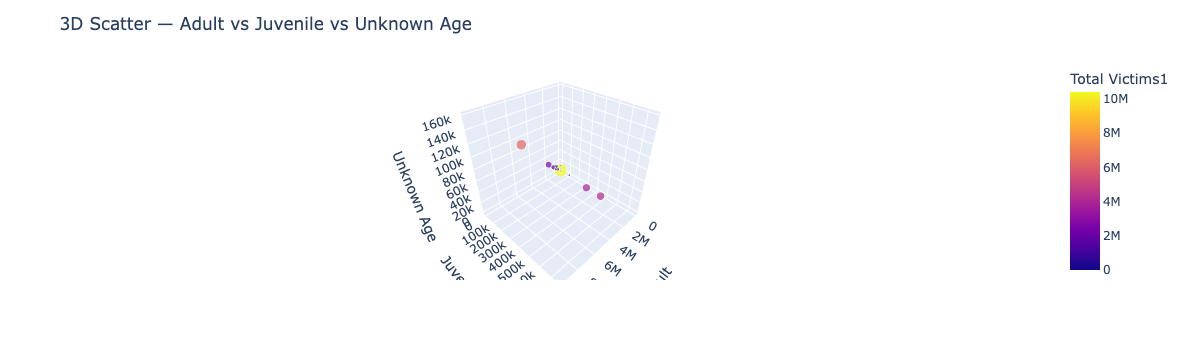

In [63]:
# 4.3 3D Scatter (Plotly) — Victims components
fig3d = px.scatter_3d(
    Victims,
    x="Adult", y="Juvenile2", z="Unknown Age",
    color="Total Victims1",
    hover_name="Offense Category",
    size="Total Victims1",
    opacity=0.7
)
fig3d.update_layout(title="3D Scatter — Adult vs Juvenile vs Unknown Age")
fig3d.show()


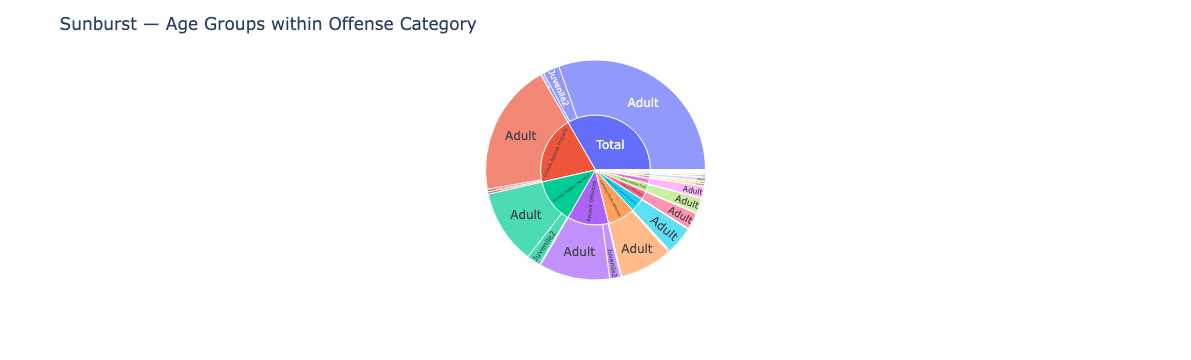

In [38]:
sun_df = Victims.melt(id_vars=["Offense Category"], value_vars=["Adult","Juvenile2","Unknown Age"], var_name="Age Group", value_name="Count")
fig_sun = px.sunburst(sun_df, path=["Offense Category","Age Group"], values="Count")
fig_sun.update_layout(title="Sunburst — Age Groups within Offense Category")
fig_sun.show()


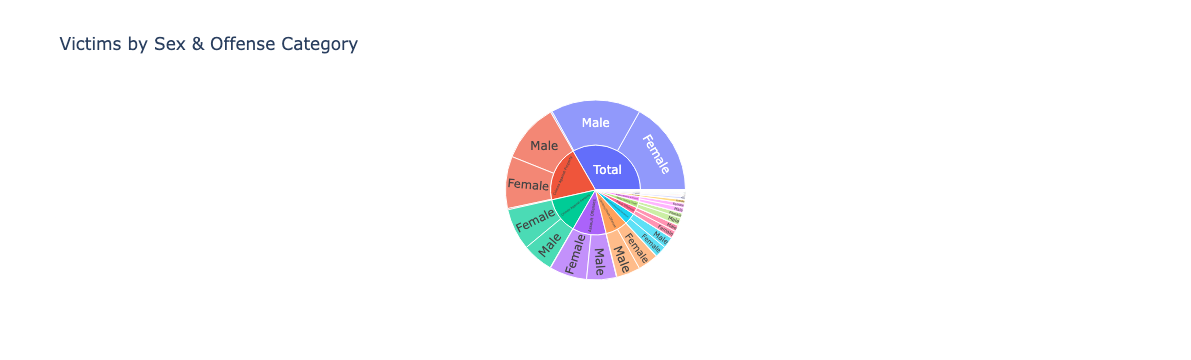

In [62]:
sex_long = Sex_Victims.melt(
    id_vars=["Offense Category"], 
    value_vars=["Male", "Female", "Unknown Sex"],
    var_name="Sex", 
    value_name="Victims"
)

# Interactive Sunburst: Victims by Sex & Offense Category
fig = px.sunburst(
    sex_long, 
    path=["Offense Category", "Sex"], 
    values="Victims", 
    title="Victims by Sex & Offense Category"
)
fig.show()

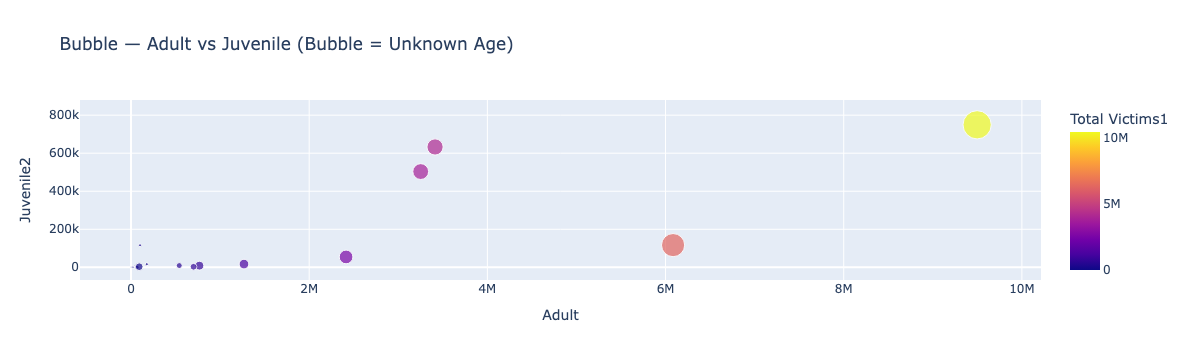

In [37]:

# 4.5 Bubble chart — Adult vs Juvenile; bubble = Unknown Age
fig_bubble = px.scatter(
    Victims,
    x="Adult", y="Juvenile2",
    size="Unknown Age", color="Total Victims1",
    hover_name="Offense Category",
    title="Bubble — Adult vs Juvenile (Bubble = Unknown Age)"
)
fig_bubble.show()

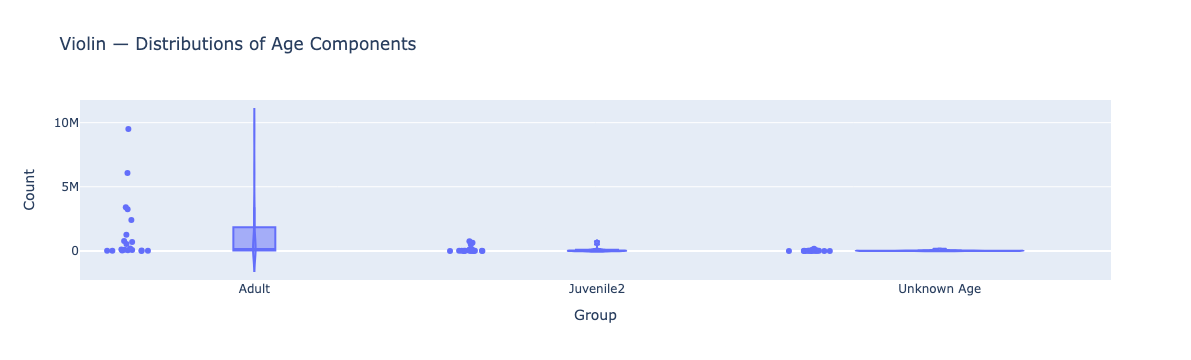

In [39]:
# 4.6 Violin — distribution by age components
vio_df = Victims[["Adult","Juvenile2","Unknown Age"]].melt(var_name="Group", value_name="Count")
fig_vio = px.violin(vio_df, x="Group", y="Count", box=True, points="all", title="Violin — Distributions of Age Components")
fig_vio.show()


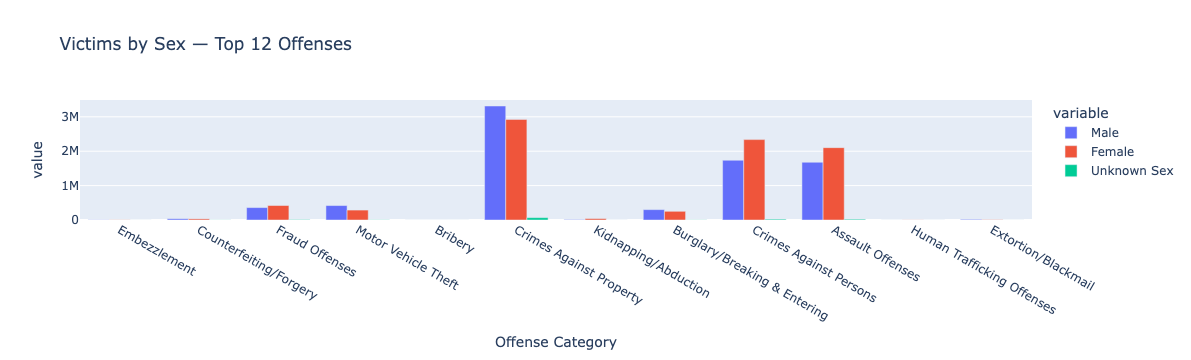

In [42]:
for col in ["Male", "Female", "Unknown Sex"]:
    Sex_Victims[col] = (
        Sex_Victims[col]
        .astype(str)
        .str.replace(",", "", regex=True)
        .astype(float)
    )

# Join safely with a suffix to avoid column overlap
sex_top = (
    Sex_Victims
    .set_index("Offense Category")
    .join(Victims.set_index("Offense Category")[["Total Victims1"]], rsuffix="_victims")
    .reset_index()
    .sort_values("Total Victims1", ascending=False)
    .head(12)
)

# Plot with Plotly
fig = px.bar(
    sex_top,
    x="Offense Category",
    y=["Male", "Female", "Unknown Sex"],
    barmode="group",
    title="Victims by Sex — Top 12 Offenses"
)
fig.show()



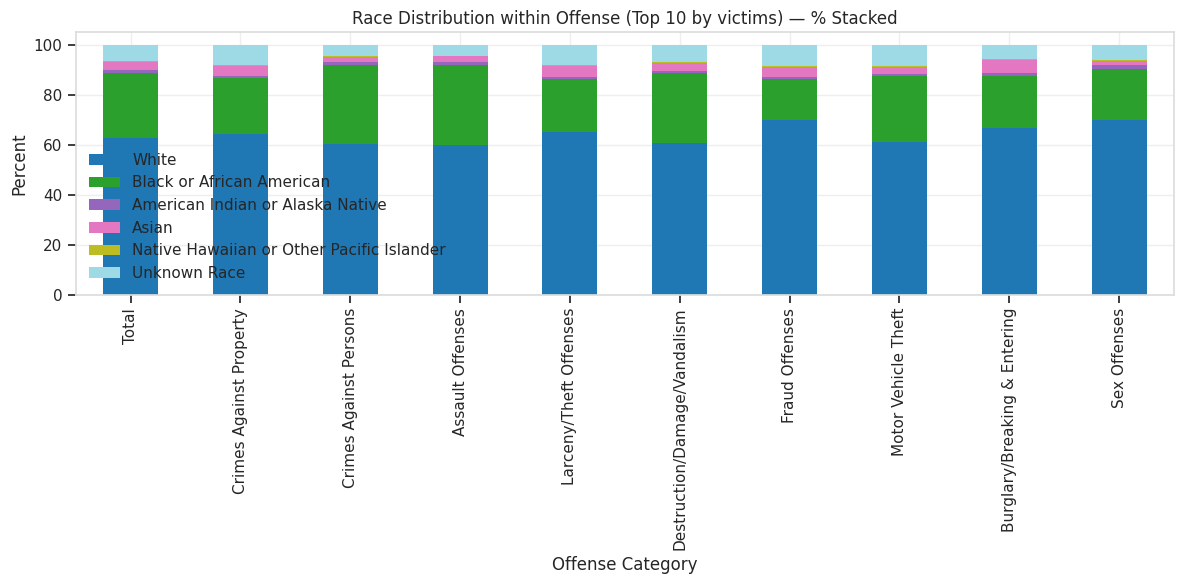

In [43]:
# 5.3 Race_Victims: Contribution of each race (stacked %)
race_plot = Race_Victims.set_index("Offense Category")[race_cols]
race_pct = race_plot.div(race_plot.sum(axis=1), axis=0) * 100
race_pct_top = race_pct.join(Victims.set_index("Offense Category")["Total Victims1"]).sort_values("Total Victims1", ascending=False).head(10).drop(columns=["Total Victims1"])
race_pct_top.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Race Distribution within Offense (Top 10 by victims) — % Stacked")
plt.ylabel("Percent")
plt.tight_layout()
plt.show()


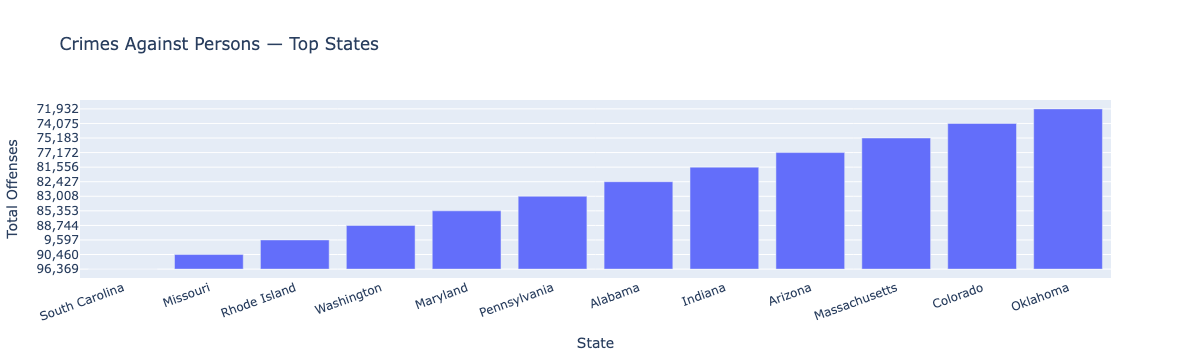

In [44]:

# 5.4 State-level: Persons/Property/Society total offenses — top states
state_persons = Crimes_Persons_State[["State","Total Offenses"]].sort_values("Total Offenses", ascending=False).head(12)
state_property = Crimes_Property_State[["State","Total Offenses"]].sort_values("Total Offenses", ascending=False).head(12)
state_society = Crimes_Society_State[["State","Total Offenses"]].sort_values("Total Offenses", ascending=False).head(12)

fig = px.bar(state_persons, x="State", y="Total Offenses", title="Crimes Against Persons — Top States")
fig.update_layout(xaxis_tickangle=-20)
fig.show()


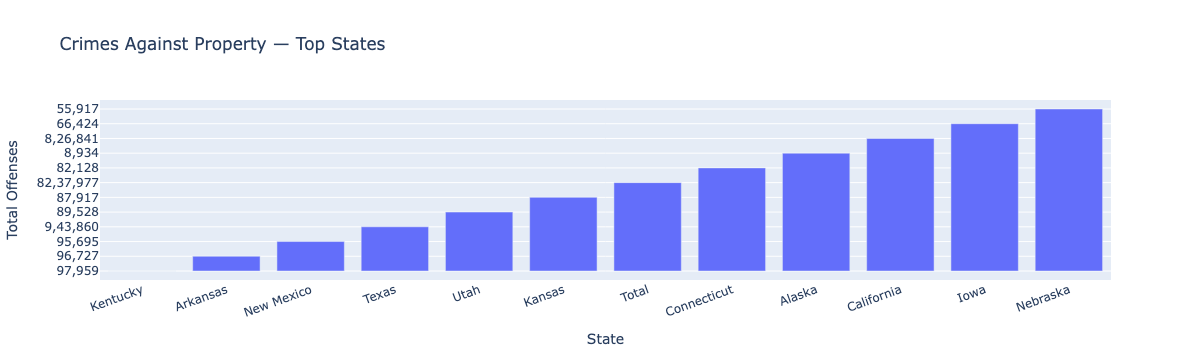

In [46]:

fig = px.bar(state_property, x="State", y="Total Offenses", title="Crimes Against Property — Top States")
fig.update_layout(xaxis_tickangle=-20)
fig.show()


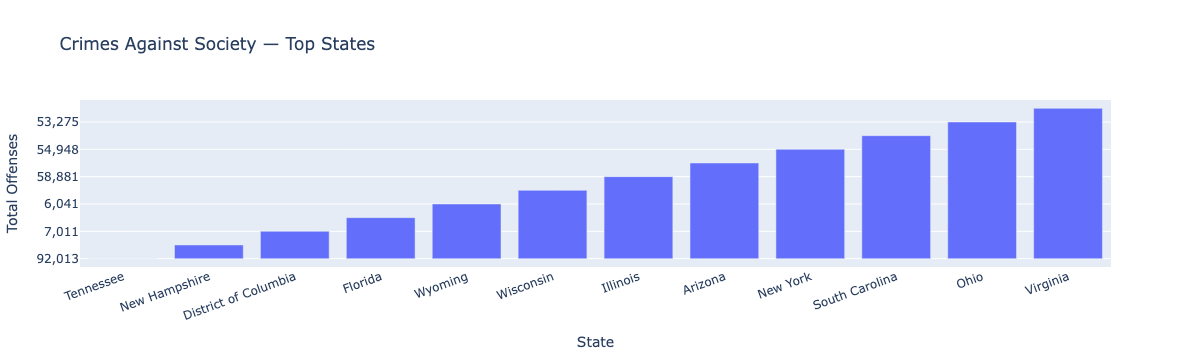

In [47]:
fig = px.bar(state_society, x="State", y="Total Offenses", title="Crimes Against Society — Top States")
fig.update_layout(xaxis_tickangle=-20)
fig.show()

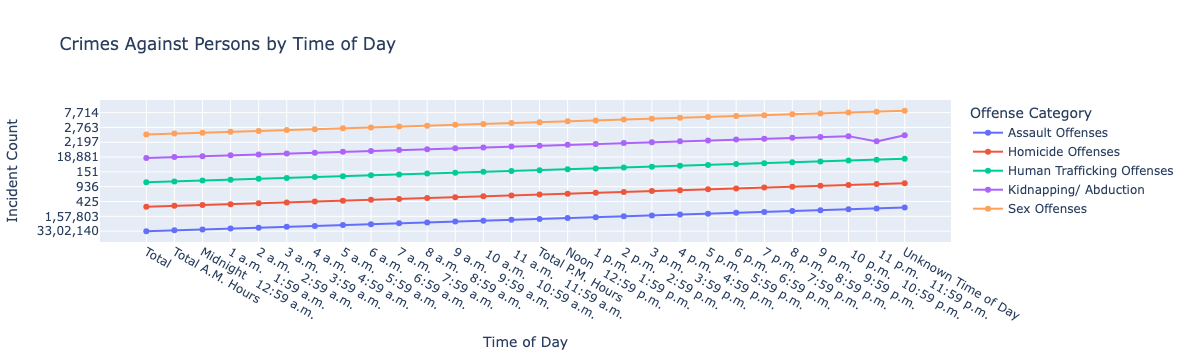

In [48]:

# ============================
# Crimes Against Persons by Time of Day
# ============================
offense_cols = [col for col in Crimes_Persons_Time.columns if col not in ["Time of Day", "Total Incidents1"]]

df_long = Crimes_Persons_Time.melt(
    id_vars="Time of Day",
    value_vars=offense_cols,
    var_name="Offense Category",
    value_name="Incident Count"
)

fig = px.line(
    df_long,
    x="Time of Day",
    y="Incident Count",
    color="Offense Category",
    markers=True,
    title="Crimes Against Persons by Time of Day"
)
fig.show()


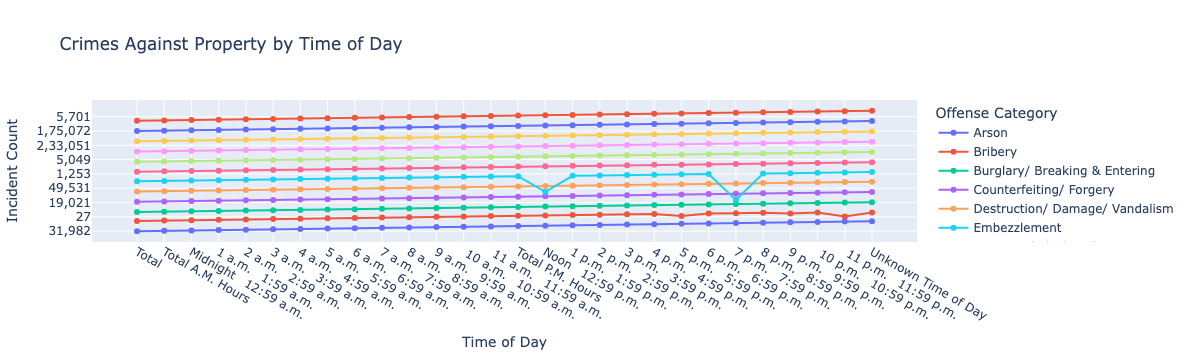

In [49]:

# ============================
# Crimes Against Property by Time of Day
# ============================
offense_cols = [col for col in Crimes_Property_Time.columns if col not in ["Time of Day", "Total Incidents1"]]

df_long = Crimes_Property_Time.melt(
    id_vars="Time of Day",
    value_vars=offense_cols,
    var_name="Offense Category",
    value_name="Incident Count"
)

fig = px.line(
    df_long,
    x="Time of Day",
    y="Incident Count",
    color="Offense Category",
    markers=True,
    title="Crimes Against Property by Time of Day"
)
fig.show()

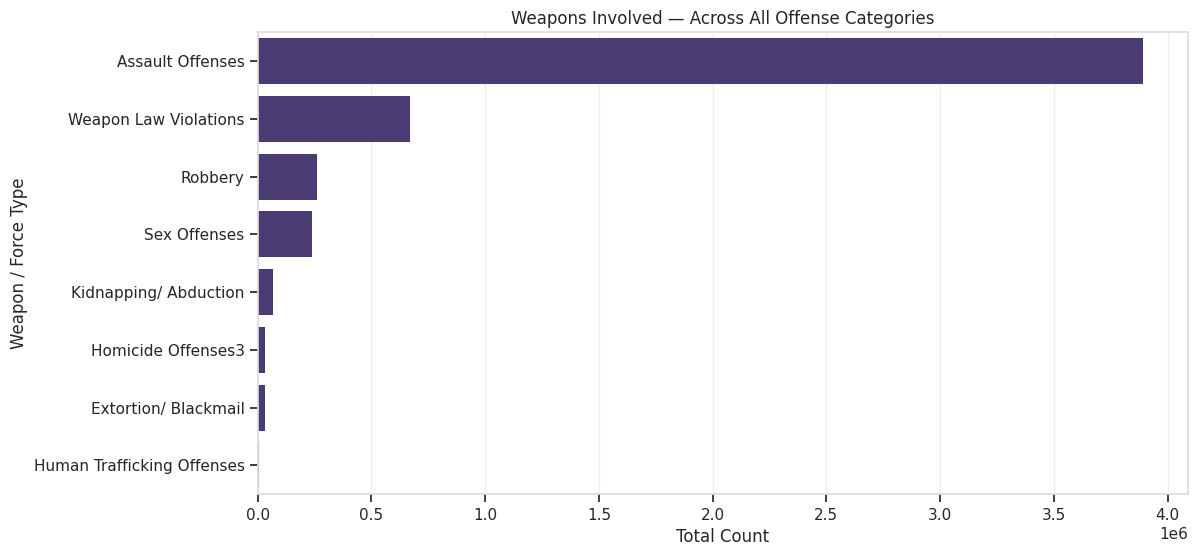

In [50]:
# 5.7 Weapons — which categories most involve weapons?

# Identify numeric columns (everything except the category column)
weap_cols = [c for c in Weapon_Use.columns if c != "Type of Weapon/ Force Involved"]

# Clean them: remove commas, convert to numeric, coerce errors to NaN
for col in weap_cols:
    Weapon_Use[col] = (
        Weapon_Use[col]
        .astype(str)
        .str.replace(",", "", regex=True)
        .str.strip()
        .replace({"": "0", "N/A": "0", "NaN": "0"})
        .astype(float)
    )

# Now safely sum
weap_sum = Weapon_Use[weap_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=weap_sum.values, y=weap_sum.index)
plt.title("Weapons Involved — Across All Offense Categories")
plt.xlabel("Total Count")
plt.ylabel("Weapon / Force Type")
plt.show()


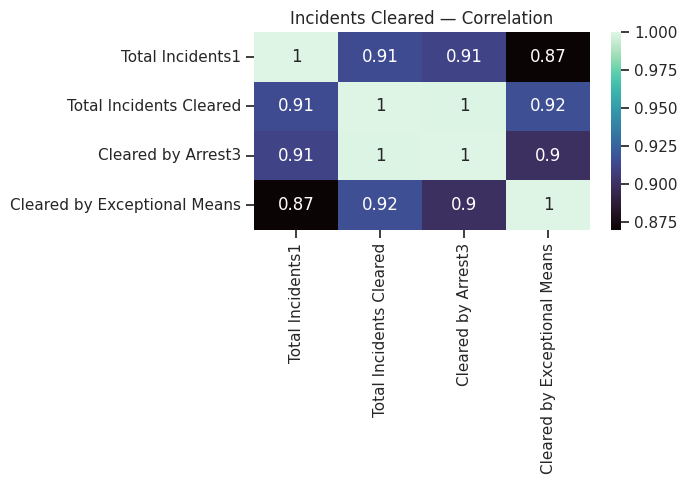

In [51]:

# 5.8 Clearances
plt.figure(figsize=(7,5))
sns.heatmap(Incidents_Cleared[["Total Incidents1","Total Incidents Cleared","Cleared by Arrest3","Cleared by Exceptional Means"]].corr(), annot=True, cmap="mako")
plt.title("Incidents Cleared — Correlation")
plt.tight_layout()
plt.show()


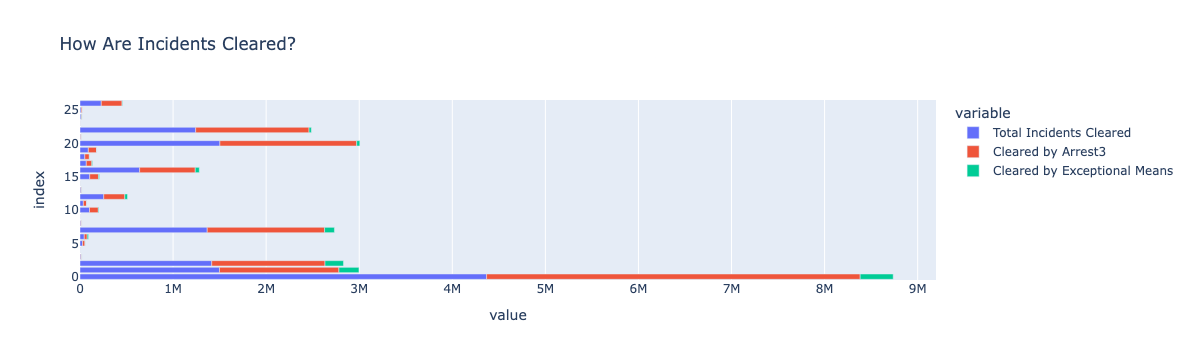

In [52]:

fig = px.bar(Incidents_Cleared, x=["Total Incidents Cleared","Cleared by Arrest3","Cleared by Exceptional Means"], title="How Are Incidents Cleared?")
fig.show()


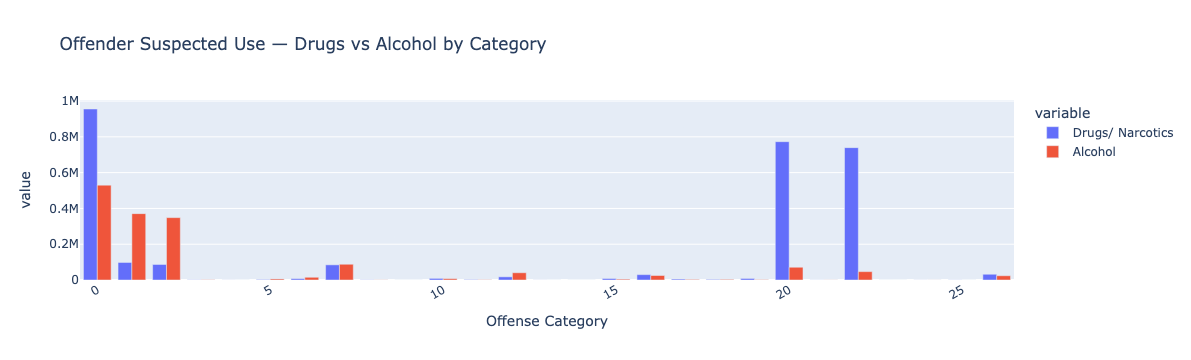

In [53]:
# 5.9 Drugs & alcohol involvement (category-level %)
Drug_Alcohol_Use_reset = Drug_Alcohol_Use.reset_index().rename(columns={"index": "Offense Category"})

# Plotly bar chart
fig = px.bar(
    Drug_Alcohol_Use_reset,
    x="Offense Category",
    y=["Drugs/ Narcotics", "Alcohol"],
    barmode="group",
    title="Offender Suspected Use — Drugs vs Alcohol by Category"
)

fig.update_layout(xaxis_title="Offense Category", xaxis_tickangle=-30)
fig.show()


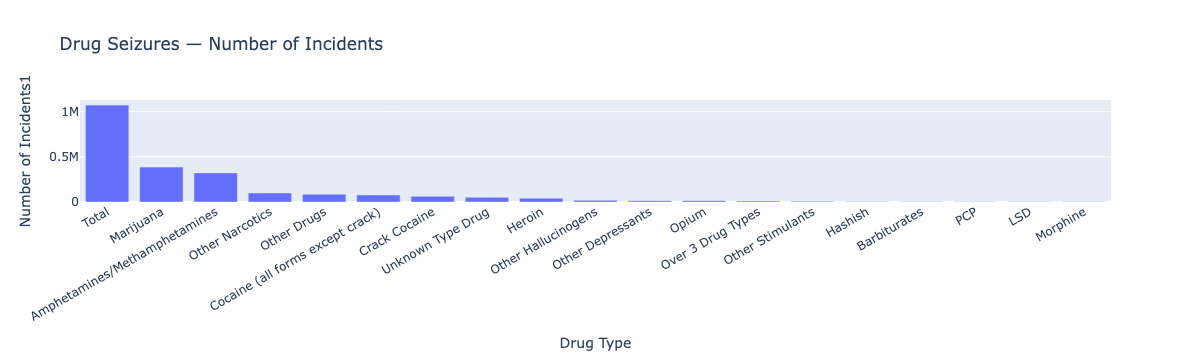

In [54]:

# 5.10 Drug seizures — which drug types most seized?
fig = px.bar(Drug_Seizures.sort_values("Number of Incidents1", ascending=False), x="Drug Type", y="Number of Incidents1", title="Drug Seizures — Number of Incidents")
fig.update_layout(xaxis_tickangle=-30)
fig.show()


In [59]:
# =====================================
# 7) INSIGHTS — Plain-language bullets
# =====================================
# These are template-style; you can copy into your report.
print("\nKey Insights (examples)\n- A small set of offenses dominates total victims (see Top 15 bar).\n- Adult and Juvenile counts are positively correlated (regplot & heatmap).\n- Sex distribution varies by offense category; some are female- or male-skewed.\n- Race composition differs by offense; stacked % bars show mix clearly.\n- Time-of-day patterns exist: property crime surges at certain hours; society crimes have distinct peaks.\n- Location analysis: certain locations (e.g., residence/parking lots) concentrate incidents depending on crime type.\n- Clearance correlation suggests stronger tie between total incidents and arrests vs exceptional means.\n- Drug seizures and suspected drug use highlight narcotics as major driver across categories.\n- 3D scatter + bubble charts offer a quick outlier scan where Unknown Age is unusually large or small.")



Key Insights (examples)
- A small set of offenses dominates total victims (see Top 15 bar).
- Adult and Juvenile counts are positively correlated (regplot & heatmap).
- Sex distribution varies by offense category; some are female- or male-skewed.
- Race composition differs by offense; stacked % bars show mix clearly.
- Time-of-day patterns exist: property crime surges at certain hours; society crimes have distinct peaks.
- Location analysis: certain locations (e.g., residence/parking lots) concentrate incidents depending on crime type.
- Clearance correlation suggests stronger tie between total incidents and arrests vs exceptional means.
- Drug seizures and suspected drug use highlight narcotics as major driver across categories.
- 3D scatter + bubble charts offer a quick outlier scan where Unknown Age is unusually large or small.


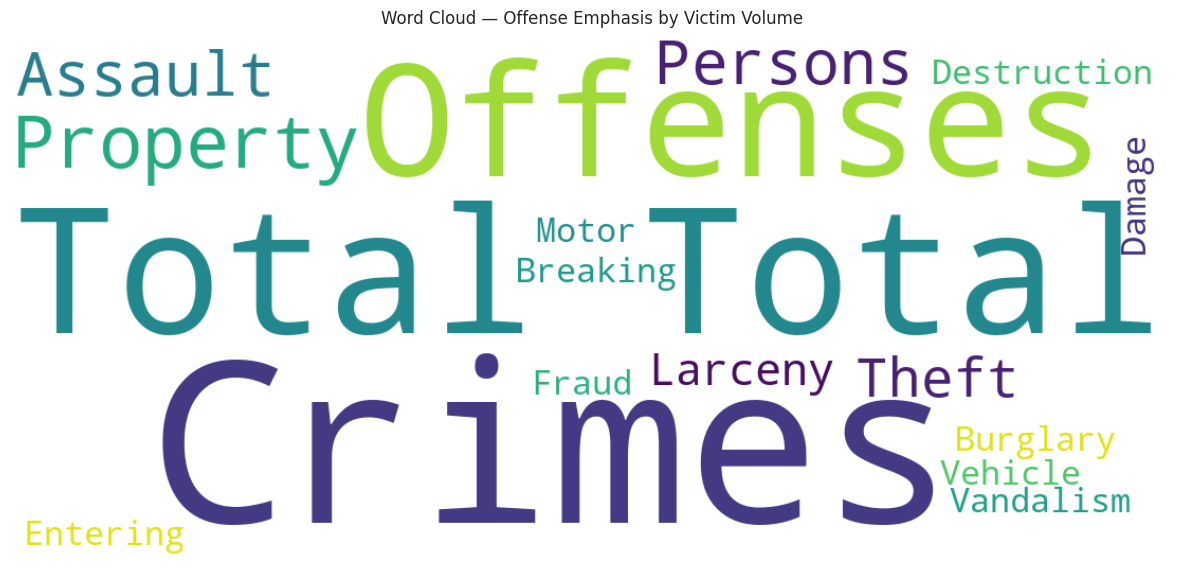

In [60]:

# 4.2 WordCloud of Offense Category (weighted by victims)
# (repeat category names proportional to victims by simple scaling)
wc_df = Victims[["Offense Category","Total Victims1"]].dropna()
wc_df = wc_df.loc[wc_df["Total Victims1"] > 0]
# build a long string without loops using repeat + join
wc_series = wc_df["Offense Category"].repeat((wc_df["Total Victims1"] / wc_df["Total Victims1"].max() * 10).round().astype(int))
wc_text = " ".join(wc_series.values)
if len(wc_text.strip()) == 0:
    wc_text = " ".join(Victims["Offense Category"].astype(str).values)
wc = WordCloud(width=1100, height=500, background_color="white").generate(wc_text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Offense Emphasis by Victim Volume")
plt.tight_layout()
plt.show()
